In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_banknote_authentication.csv')
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df['Class'].value_counts()

Class
0    762
1    610
Name: count, dtype: int64

In [5]:
df.duplicated().value_counts()

False    1348
True       24
Name: count, dtype: int64

In [7]:
df = df.drop_duplicates()

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

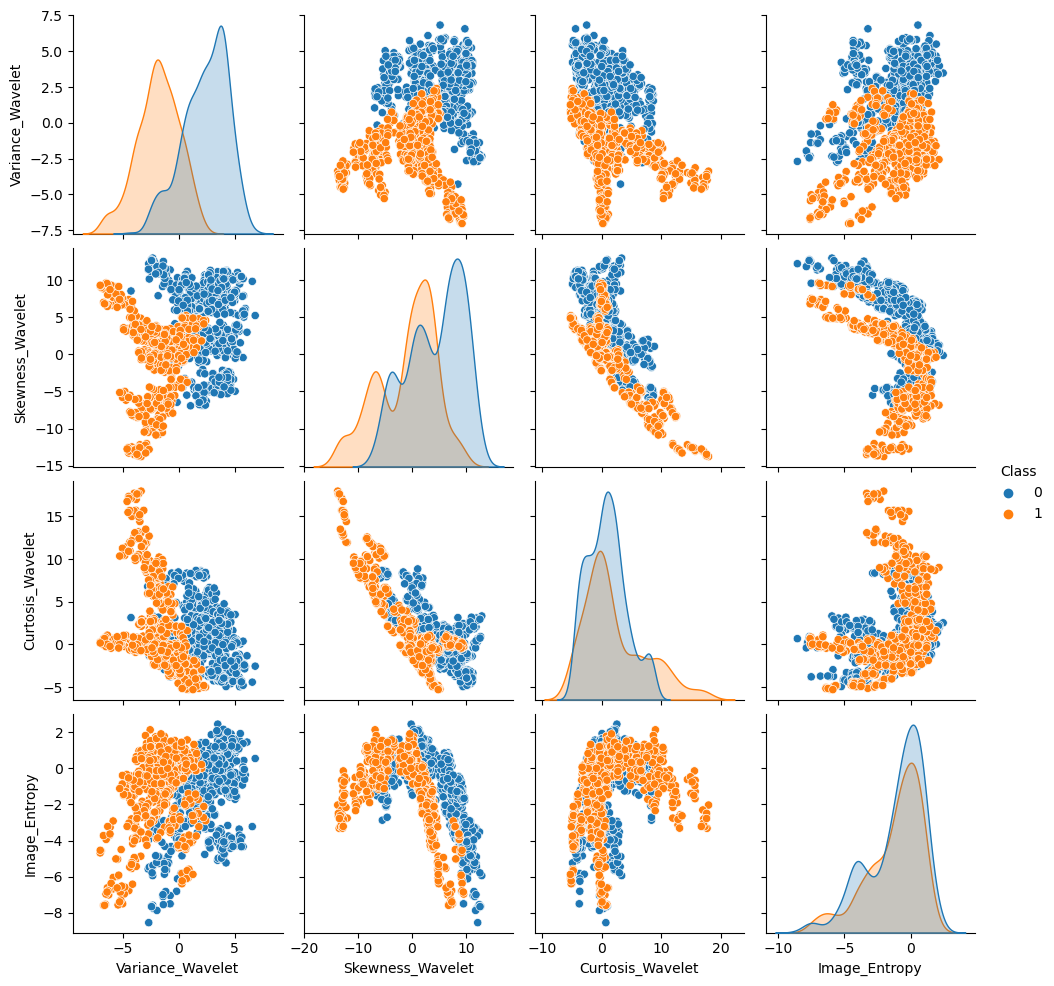

In [8]:
sns.pairplot(df,hue='Class')

In [9]:
X = df.drop('Class',axis=1)
y = df['Class']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=101)

In [12]:
from sklearn.model_selection import GridSearchCV

In [22]:
n_estimators = [64,100,128,200]
max_features = [2,3,4]
bootstrap = [True, False]
oob_score = [True]

In [23]:
param_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'bootstrap': bootstrap,
    'oob_score': oob_score
}

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid)

In [26]:
#import warnings
#warnings.filterwarnings('ignore',category=FutureWarning)

In [27]:
grid.fit(X_train,y_train)

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_mess

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True]})

In [29]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': True}

In [30]:
pred = grid.predict(X_test)

In [31]:
pred

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1])

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [33]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00        92

    accuracy                           1.00       203
   macro avg       1.00      1.00      1.00       203
weighted avg       1.00      1.00      1.00       203



In [34]:
confusion_matrix(y_test, pred)

array([[111,   0],
       [  0,  92]])

In [36]:
grid.best_estimator_.oob_score_

0.9903930131004367

###### Understanding Number of Estimators (Trees)

In [42]:
errors = []
misclassifications = []

for n in range(1,64):
    rfc = RandomForestClassifier(n_estimators=n, bootstrap=True, max_features=2)
    rfc.fit(X_train,y_train)
    y_pred = rfc.predict(X_test)
    err = 1 - accuracy_score(y_pred,y_test)
    n_missed = np.sum(y_pred != y_test)
    
    errors.append(err)
    misclassifications.append(n_missed)

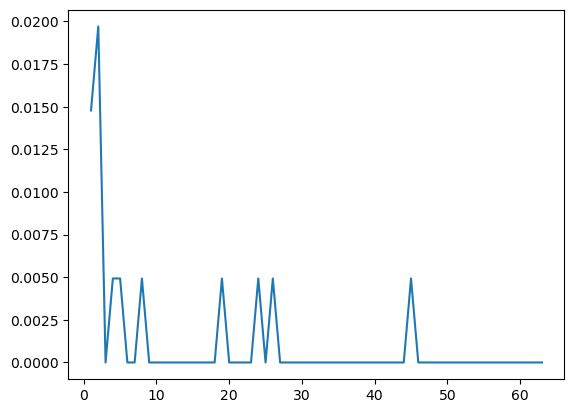

In [40]:
plt.plot(range(1,64),errors)

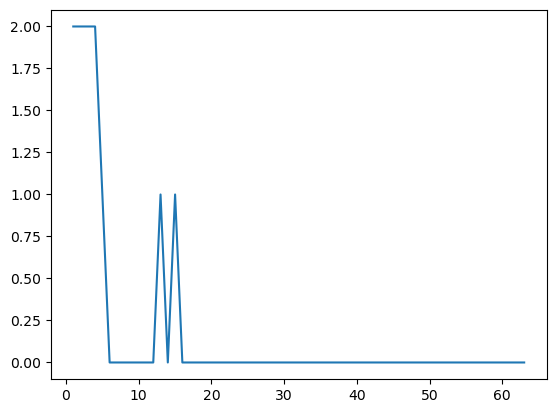

In [44]:
plt.plot(range(1,64),misclassifications)